# I. Numpy

### Импортируйте NumPy

In [99]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [100]:
a_1 = np.array([1 if i == 4 else 0 for i in range(10)])
a_1 = a_1.reshape((2, 5))
print(a_1)

[[0 0 0 0 1]
 [0 0 0 0 0]]


### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [101]:
a_2 = np.arange(10, 50, 1)
a_2 = a_2[::-1]
print(a_2[a_2 % 2 == 0])

[48 46 44 42 40 38 36 34 32 30 28 26 24 22 20 18 16 14 12 10]


### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [102]:
a_3 = np.arange(0, 9, 1)
a_3 = a_3.reshape((3, 3))
print(a_3)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [103]:
a_4 = np.random.rand(4, 3, 2)
print(a_4.max(), a_4.min())

0.9935001457434596 0.009752425474530368


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [104]:
a_5_1 = np.random.rand(6, 4)
a_5_2 = np.random.rand(4, 3)
mul = np.matmul(a_5_1, a_5_2)
print(mul)

[[0.57291332 1.01220329 0.50032281]
 [1.44148564 1.12888776 0.81497971]
 [1.022903   0.75612971 0.79884131]
 [0.69977897 0.62652521 0.5689383 ]
 [0.79353084 1.3129501  1.09298975]
 [1.24707186 0.77053175 0.86226274]]


### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [105]:
from sklearn.preprocessing import normalize

a_6 = np.random.rand(7, 7)
print(a_6.mean(), a_6.std())

a_6 = normalize(a_6)
print(a_6)

0.4961879007872524 0.279353520682639
[[0.48881123 0.30216687 0.15269976 0.19595025 0.51512225 0.26348159
  0.52275383]
 [0.26635463 0.3843077  0.45304635 0.1469218  0.62550343 0.40291049
  0.03056788]
 [0.38239369 0.50657134 0.47038407 0.19727294 0.37577822 0.33507572
  0.28895975]
 [0.39611836 0.09277501 0.56159484 0.16829125 0.21142362 0.29974488
  0.5968462 ]
 [0.24778324 0.154538   0.49345783 0.37574493 0.41468122 0.51191775
  0.30986496]
 [0.49259584 0.09718134 0.44742049 0.44847639 0.58490985 0.04006329
  0.05351974]
 [0.34280888 0.76569136 0.292028   0.02700233 0.01301169 0.33421487
  0.31356092]]


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [130]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузите датасет Tips из набора датасетов seaborn

In [107]:
tips_df = sns.load_dataset('tips')

### Посмотрите на первые 5 строчек

In [108]:
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [109]:
print(tips_df.shape)

(244, 7)


### Проверьте есть ли пропуски в данных

In [112]:
tips_df.isna()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


### Посмотрите на распределение числовых признаков

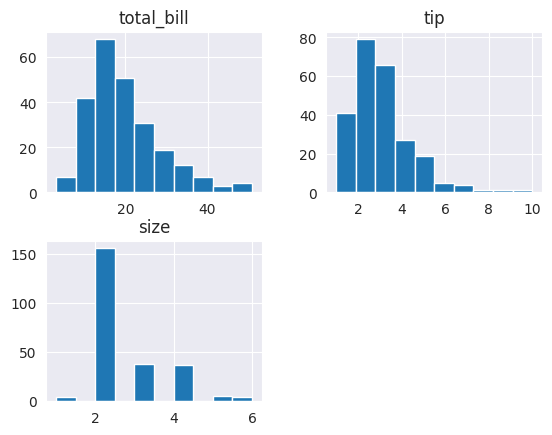

In [113]:
tips_df.hist();

### Найдите максимальное значение 'total_bill'

In [114]:
tips_df['total_bill'].max()

50.81

### Найдите количество курящих людей

In [118]:
tips_df[tips_df['smoker'] == 'Yes'].shape[0]

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [120]:
tips_df.groupby('day', observed=False)['total_bill'].mean().sort_values()


day
Fri     17.151579
Thur    17.682742
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [121]:
med = tips_df['total_bill'].median()
print(med)
print(tips_df[tips_df['total_bill'] > med])
tips_df.groupby('sex', observed=False)['tip'].mean().sort_values()

17.795
     total_bill   tip     sex smoker   day    time  size
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
7         26.88  3.12    Male     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[122 rows x 7 columns]


sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [125]:
tips_df['smoker'] = tips_df['smoker'].apply(lambda x: 0 if x == 'No' else 1)
tips_df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,1,Sun,Dinner,2
1,10.34,1.66,Male,1,Sun,Dinner,3
2,21.01,3.50,Male,1,Sun,Dinner,3
3,23.68,3.31,Male,1,Sun,Dinner,2
4,24.59,3.61,Female,1,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,1,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,1,Sat,Dinner,2


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

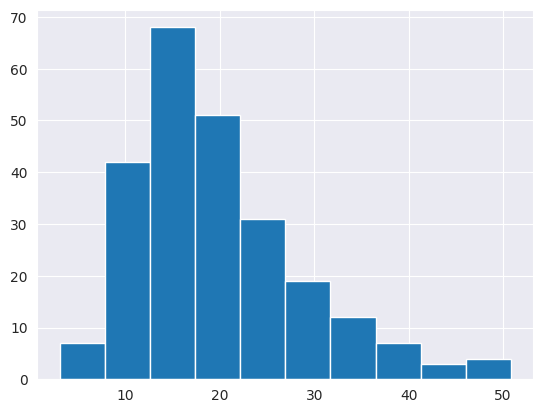

In [126]:
tips_df['total_bill'].hist();

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

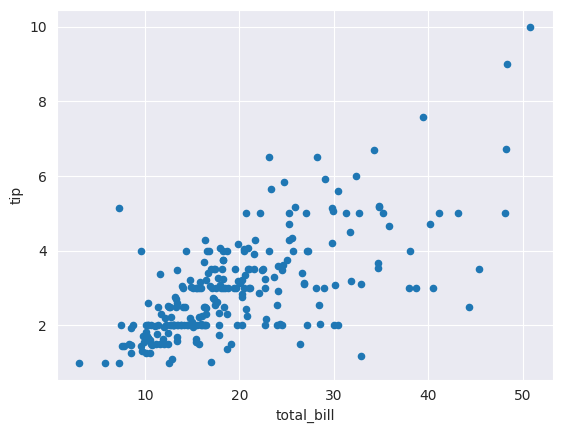

In [127]:
tips_df.plot.scatter(x='total_bill', y='tip');

### Постройте pairplot

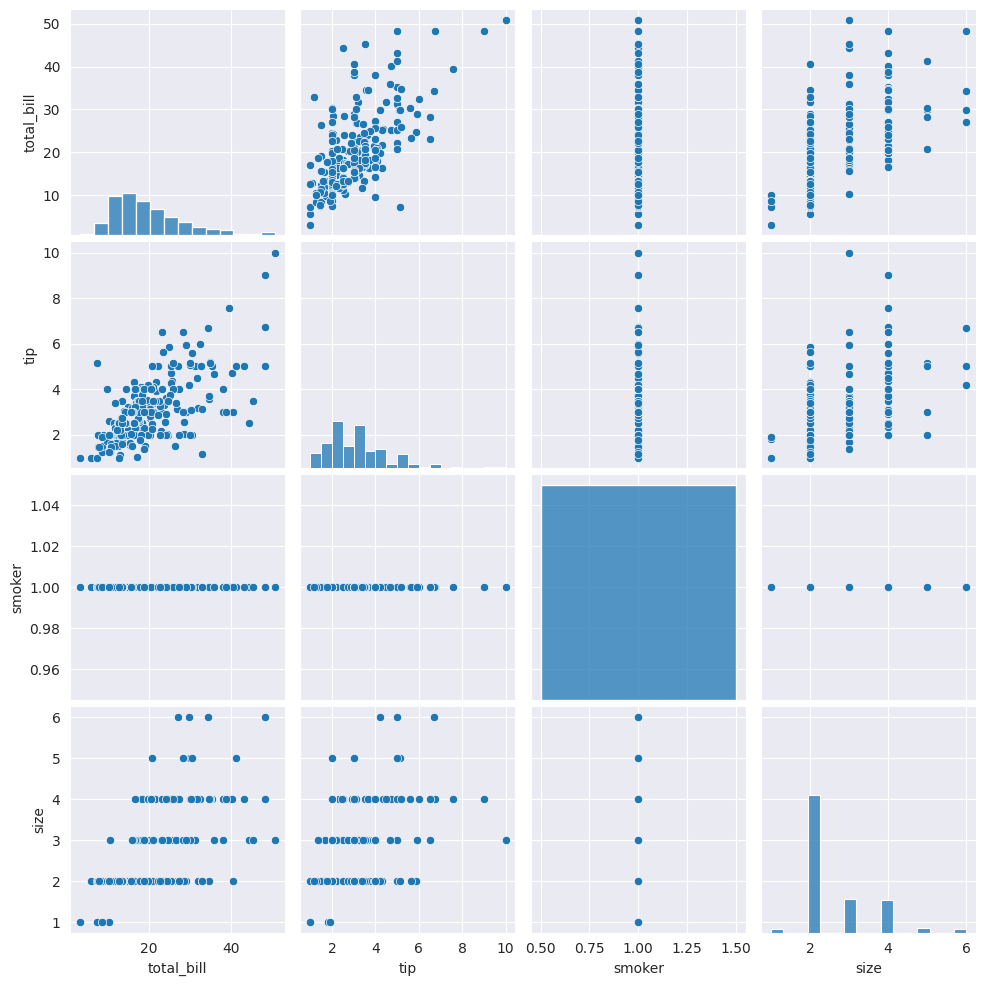

In [128]:
sns.pairplot(tips_df, height=2.5);

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

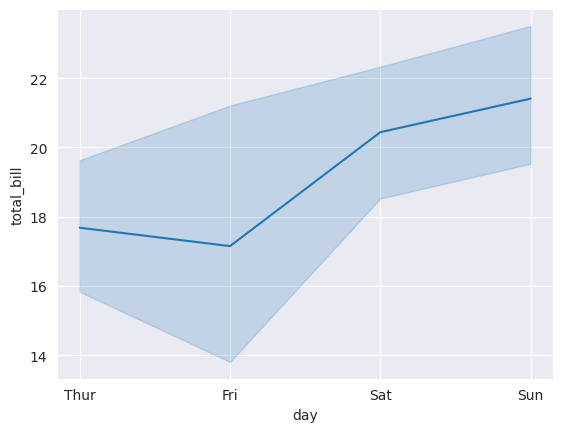

In [135]:
sns.lineplot(y='total_bill', x='day', data=tips_df);

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

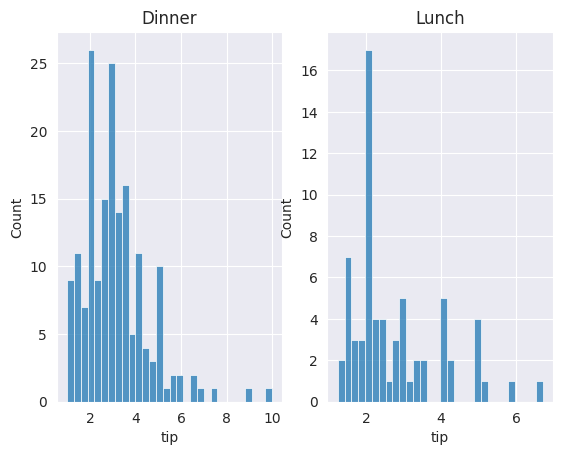

In [131]:
time_v = tips_df['time'].unique()
fig, axes = mpl.pyplot.subplots(1, time_v.size)
for t_val, ax in zip(time_v, axes.flat):
    time_v_el = tips_df[tips_df['time'] == t_val]
    sns.histplot(time_v_el['tip'], kde=False, bins=30, ax=ax).set(title=t_val)

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

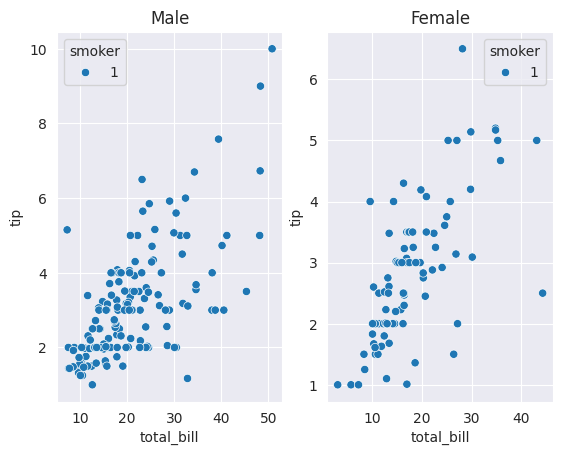

In [134]:
fig, axes = plt.subplots(1, 2)
sns.scatterplot(data=tips_df[tips_df['sex']=='Male'], x="total_bill", y="tip", hue="smoker", ax=axes[0]).set(title='Male');
sns.scatterplot(data=tips_df[tips_df['sex']=='Female'], x="total_bill", y="tip", hue="smoker", ax=axes[1]).set(title='Female');

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

In [ ]:
Выводы:
1. В соответствии с гистограммой распределения признака 'total_bill', общая сумма для большинства чеков составляет примерно 15.
2. На диаграмме рассеяния между 'total_bill' и 'tip' видно, что для большинства счетов зависимость близка к линейной.
3. На графике взаимосвязи 'total_bill' и 'day' видно, что средний чек растет от пятницы к воскресенью.
4. На гистограммах распределения 'tip' в зависимости от 'time' видно, что большее количество чаевых равно 2 в независимости от времени.
5. На диаграммах рассеяния между 'total_bill' и 'tip' с разбиением по полу примерно схожая картина.